In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [46]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
raw_mail_data.value_counts('Category')

Category
ham     4825
spam     747
Name: count, dtype: int64

In [48]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
# label spam mail as 0;  inbox mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1


In [49]:
# separating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)


# # transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


# **Naive Bayes Algorithm**

In [50]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(X_train_features, Y_train)


MultinomialNB()

**Model Training**

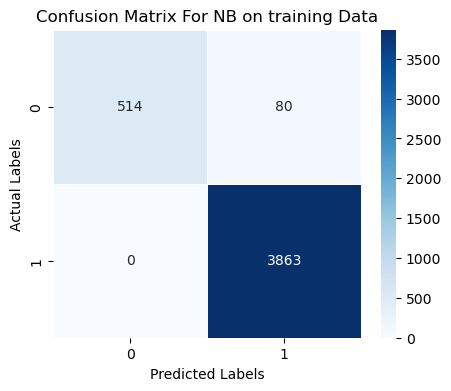

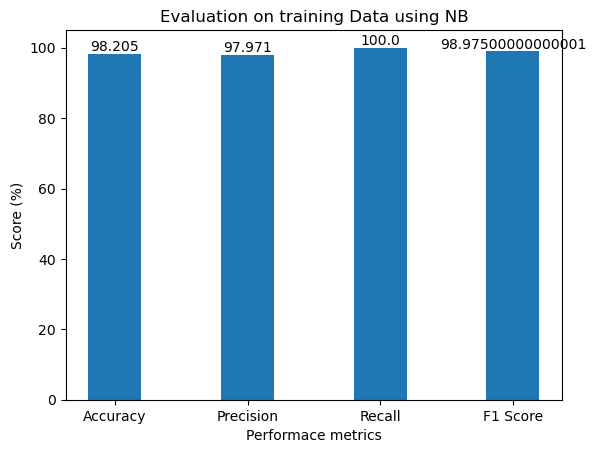

Accuracy: 98.205%
Precision: 97.971%
Recall: 100.0%
F1 Score: 98.97500000000001%


In [51]:
train_pred=nb.predict(X_train_features)

nb_a=round(accuracy_score(Y_train,train_pred),5)*100
nb_p=round(precision_score(Y_train,train_pred),5)*100
nb_r=round(recall_score(Y_train,train_pred),5)*100
nb_f1=round(f1_score(Y_train,train_pred),5)*100
cm = confusion_matrix(Y_train, train_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For NB on training Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [nb_a, nb_p, nb_r,nb_f1]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on training Data using NB")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {nb_a}%')
print(f'Precision: {nb_p}%')
print(f'Recall: {nb_r}%')
print(f'F1 Score: {nb_f1}%')

**Model Testing**

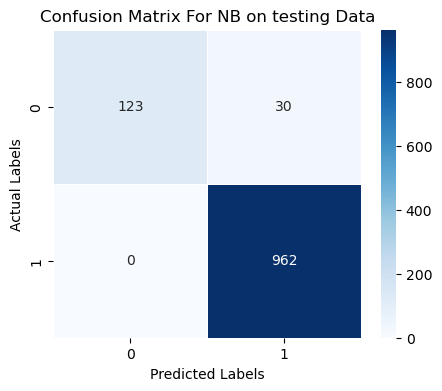

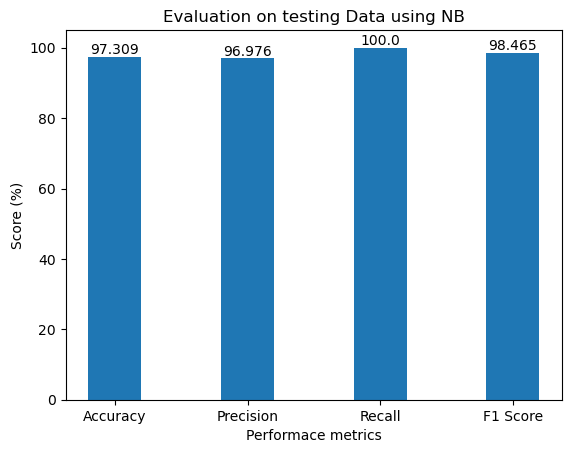

Accuracy: 97.309%
Precision: 96.976%
Recall: 100.0%
F1 Score: 98.465%


In [52]:
test_pred=nb.predict(X_test_features)


nb_a_t=round(accuracy_score(Y_test,test_pred),5)*100
nb_p_t=round(precision_score(Y_test,test_pred),5)*100
nb_r_t=round(recall_score(Y_test,test_pred),5)*100
nb_f1_t=round(f1_score(Y_test,test_pred),5)*100
cm = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For NB on testing Data')

plt.show()


################ Bar Graph ################
X = ['Accuracy','Precision','Recall','F1 Score']
evl_mpl = [nb_a_t, nb_p_t, nb_r_t,nb_f1_t]
X_axis = np.arange(len(X))
bars=plt.bar(X_axis, evl_mpl, 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,  # position: center top edge
     str(height), ha='center', va='bottom')
plt.xticks(X_axis, X)
plt.title("Evaluation on testing Data using NB")
plt.xlabel("Performace metrics")
plt.ylabel("Score (%)")
plt.show()
##################################

print(f'Accuracy: {nb_a_t}%')
print(f'Precision: {nb_p_t}%')
print(f'Recall: {nb_r_t}%')
print(f'F1 Score: {nb_f1_t}%')